In [13]:
from google.cloud.bigquery import Client, QueryJobConfig
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

client = Client()

In [ ]:
sql_query = "SELECT * FROM `bigquery-public-data.new_york_mv_collisions.nypd_mv_collisions` LIMIT 10"

bigquery_response = client.query(sql_query)

df = bigquery_response.to_dataframe()

In [6]:
df.head()

,borough,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,cross_street_name,timestamp,latitude,longitude,...,number_of_persons_killed,off_street_name,on_street_name,unique_key,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,zip_code
0,None,Fatigued/Drowsy,Fatigued/Drowsy,Unspecified,None,None,None,2014-04-10 22:00:00,NaN,NaN,...,0,None,None,3090695,PASSENGER VEHICLE,PASSENGER VEHICLE,VAN,None,None,<NA>
1,None,Other Electronic Device,Other Electronic Device,None,None,None,JAY STREET,2014-04-07 23:21:00,NaN,NaN,...,0,None,SANDS STREET,317210,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,None,None,None,<NA>
2,None,Unspecified,None,None,None,None,EAST 153 STREET,2014-05-03 17:53:00,NaN,NaN,...,0,None,3 AVENUE,330832,UNKNOWN,None,None,None,None,<NA>
3,None,Unspecified,None,None,None,None,None,2014-03-18 16:10:00,NaN,NaN,...,0,PARKING LOT 82-07 153 AVENUE,None,308098,PASSENGER VEHICLE,PASSENGER VEHICLE,None,None,None,<NA>
4,None,Driver Inattention/Distraction,Unspecified,None,None,None,ELDERTS LANE,2014-03-22 18:43:00,NaN,NaN,...,0,None,CONDUIT BOULEVARD,309477,PASSENGER VEHICLE,PASSENGER VEHICLE,None,None,None,<NA>


## Boroughs by number of collisions

In [11]:
sql_query = " \
    SELECT borough, COUNT(*) AS number_of_collisions \
    FROM `bigquery-public-data.new_york_mv_collisions.nypd_mv_collisions` \
    GROUP BY borough \
    ORDER BY number_of_collisions DESC \
"

bigquery_response = client.query(sql_query)

collisions_by_borough = bigquery_response.to_dataframe()

In [18]:
collisions_by_borough.drop(index=0, inplace=True)

In [19]:
collisions_by_borough

,borough,number_of_collisions
1,BROOKLYN,453525
2,QUEENS,382467
3,MANHATTAN,319677
4,BRONX,210812
5,STATEN ISLAND,59876


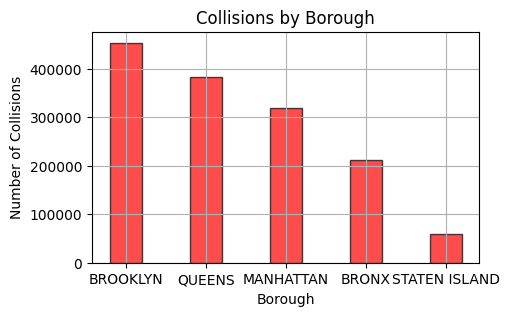

In [21]:
plt.figure(figsize=(5, 3))
plt.bar(x=collisions_by_borough["borough"], 
        height=collisions_by_borough["number_of_collisions"],
        width=0.4, color="red", alpha=0.7, edgecolor="black")
plt.title("Collisions by Borough")
plt.xlabel("Borough")
plt.ylabel("Number of Collisions")
plt.grid(True)
plt.show()

In [ ]:
### Which zipcodes are the most dangerous?

In [23]:
sql_query = " \
    SELECT zip_code, COUNT(*) AS number_of_collisions \
    FROM `bigquery-public-data.new_york_mv_collisions.nypd_mv_collisions` \
    GROUP BY zip_code \
    ORDER BY number_of_collisions DESC \
"

bigquery_response = client.query(sql_query)

collisions_by_zipcode = bigquery_response.to_dataframe()

In [25]:
collisions_by_zipcode.drop(index=0, inplace=True)

In [34]:
collisions_by_zipcode["zip_code"] = collisions_by_zipcode["zip_code"].astype(np.string_)

In [35]:
collisions_by_zipcode.head()

,zip_code,number_of_collisions
1,b'11207',27710
2,b'11236',19212
3,b'11101',19170
4,b'11203',18316
5,b'11234',17967


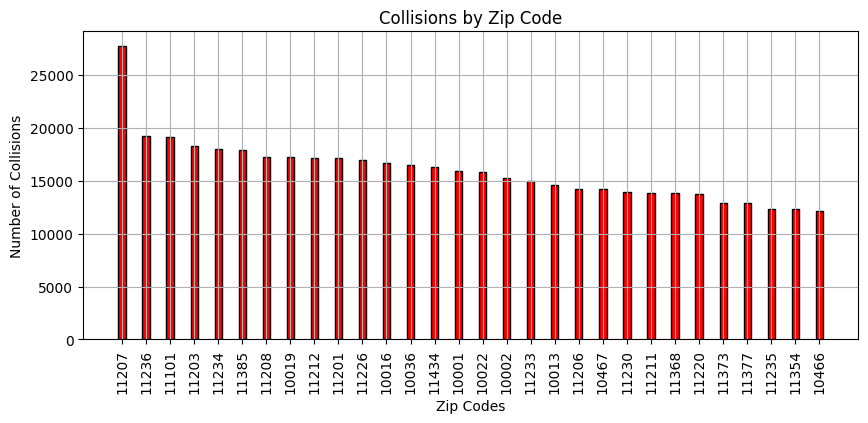

In [39]:
plt.figure(figsize=(10, 4))
plt.bar(x=collisions_by_zipcode[:30]["zip_code"], 
        height=collisions_by_zipcode[:30]["number_of_collisions"],
        width=0.3, color="red", edgecolor="black")
plt.xticks(rotation=90)
plt.title("Collisions by Zip Code")
plt.xlabel("Zip Codes")
plt.ylabel("Number of Collisions")
plt.grid(True)
plt.show()

## Let's scatter plot the longitudes and latitudes

In [71]:
sql_query = " \
    SELECT longitude, latitude \
    FROM `bigquery-public-data.new_york_mv_collisions.nypd_mv_collisions` \
    WHERE (longitude IS NOT NULL) \
    AND (latitude IS NOT NULL) \
"

bigquery_response = client.query(sql_query)

longitude_latitude = bigquery_response.to_dataframe()

#### First let's ensure the distributions of longitudes and latitudes values make sense

In [110]:
def clean_longitude_latitude(dataframe):
    print("Shape before removing faulty longitudes:", dataframe.shape)
    longitude_rows_to_drop = dataframe[dataframe["longitude"] < -74.27].index
    dataframe.drop(labels=longitude_rows_to_drop, inplace=True)

    longitude_rows_to_drop = dataframe[dataframe["longitude"] > -73.68].index
    dataframe.drop(labels=longitude_rows_to_drop, inplace=True)
    print("Shape after removing faulty longitudes:", dataframe.shape, "\n")
    
    print("Shape before removing faulty latitudes:", dataframe.shape)
    latitude_rows_to_drop = dataframe[dataframe["latitude"] < 40.49].index
    dataframe.drop(labels=latitude_rows_to_drop, inplace=True)

    latitude_rows_to_drop = dataframe[dataframe["latitude"] > 40.90].index
    dataframe.drop(labels=latitude_rows_to_drop, inplace=True)
    print("Shape after removing faulty latitudes:", dataframe.shape)
    
    return dataframe

In [111]:
longitude_latitude = clean_longitude_latitude(longitude_latitude)

Shape before removing faulty longitudes: (1827802, 2)
Shape after removing faulty longitudes: (1827802, 2) 

Shape before removing faulty latitudes: (1827802, 2)
Shape after removing faulty latitudes: (1827802, 2)


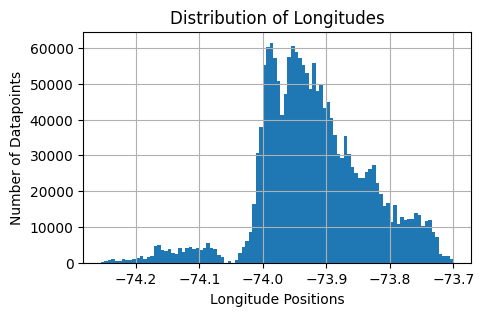

In [112]:
plt.figure(figsize=(5, 3))
longitude_latitude["longitude"].hist(bins=100)
plt.title("Distribution of Longitudes")
plt.xlabel("Longitude Positions")
plt.ylabel("Number of Datapoints")
plt.show()

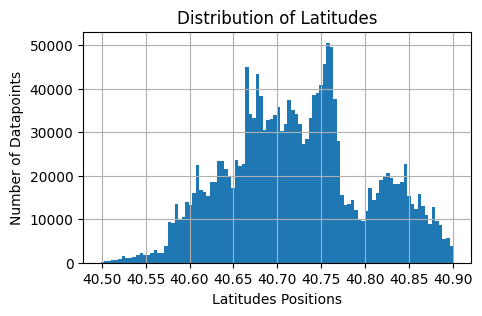

In [113]:
plt.figure(figsize=(5, 3))
longitude_latitude["latitude"].hist(bins=100)
plt.title("Distribution of Latitudes")
plt.xlabel("Latitudes Positions")
plt.ylabel("Number of Datapoints")
plt.show()

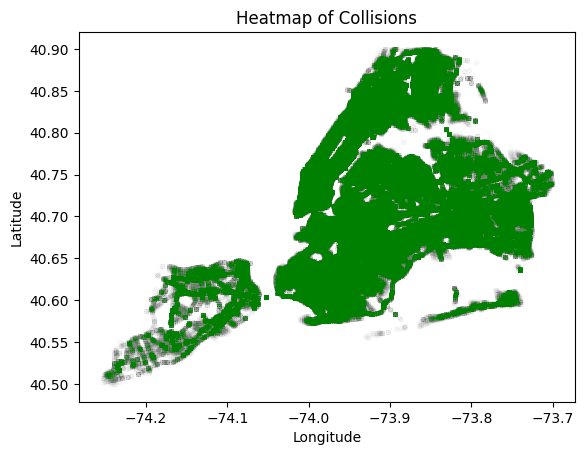

In [114]:
plt.scatter(x=longitude_latitude["longitude"], y=longitude_latitude["latitude"],
            color="green", s=10, alpha=0.002)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Heatmap of Collisions")
plt.show()

## Lethal collisions and the resulting deaths/injuries

In [93]:
sql_query = " \
    SELECT number_of_persons_killed, COUNT(*) AS number_of_collisions \
    FROM `bigquery-public-data.new_york_mv_collisions.nypd_mv_collisions` \
    GROUP BY number_of_persons_killed \
    ORDER BY number_of_collisions DESC \
"

bigquery_response = client.query(sql_query)

number_of_collisions_by_deaths = bigquery_response.to_dataframe()

In [94]:
number_of_collisions_by_deaths = number_of_collisions_by_deaths[number_of_collisions_by_deaths["number_of_persons_killed"] > 0]
number_of_collisions_by_deaths

,number_of_persons_killed,number_of_collisions
1,1,2871
2,2,74
3,3,12
4,4,3
5,5,2
6,8,1


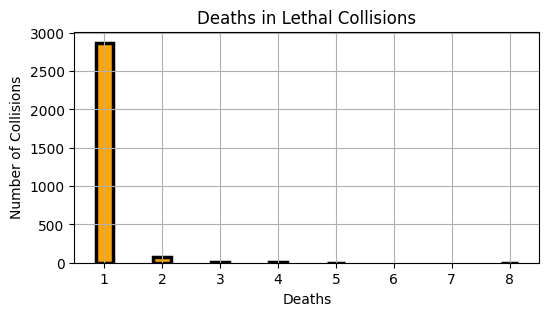

In [95]:
plt.figure(figsize=(6, 3))
plt.bar(x=number_of_collisions_by_deaths["number_of_persons_killed"], 
        height=number_of_collisions_by_deaths["number_of_collisions"],
        width=0.3, color="orange", edgecolor="black", linewidth=2.5)
plt.title("Deaths in Lethal Collisions")
plt.xlabel("Deaths")
plt.ylabel("Number of Collisions")
plt.grid(True)
plt.show()

## Scatter plot of where the lethal collisions most frequently occur

In [138]:
sql_query = " \
    SELECT number_of_persons_killed, \
    number_of_pedestrians_killed, \
    number_of_cyclist_killed, \
    number_of_motorist_killed, \
    longitude, latitude \
    FROM `bigquery-public-data.new_york_mv_collisions.nypd_mv_collisions` \
    WHERE number_of_persons_killed > 0 \
    AND (longitude IS NOT NULL) \
    AND (latitude IS NOT NULL) \
"

bigquery_response = client.query(sql_query)

lethal_collisions = bigquery_response.to_dataframe()

In [159]:
lethal_collisions.head()

,number_of_persons_killed,number_of_pedestrians_killed,number_of_cyclist_killed,number_of_motorist_killed,longitude,latitude
1,1.0,1,0,0,-73.987960,40.576275
2,1.0,0,0,1,-73.921570,40.583690
3,1.0,0,0,1,-73.997574,40.594550
4,1.0,1,0,0,-74.079817,40.606103
5,1.0,1,0,0,-73.922510,40.609810


In [139]:
print(lethal_collisions.shape)

# drop null values
lethal_collisions.dropna(inplace=True)

# remove faulty longitude and latitude values
lethal_collisions = clean_longitude_latitude(lethal_collisions)

(2580, 6)
Shape before removing faulty longitudes: (2580, 6)
Shape after removing faulty longitudes: (2570, 6) 

Shape before removing faulty latitudes: (2570, 6)
Shape after removing faulty latitudes: (2562, 6)


In [140]:
lethal_collisions["number_of_persons_killed"] = lethal_collisions["number_of_persons_killed"].astype(np.float16)

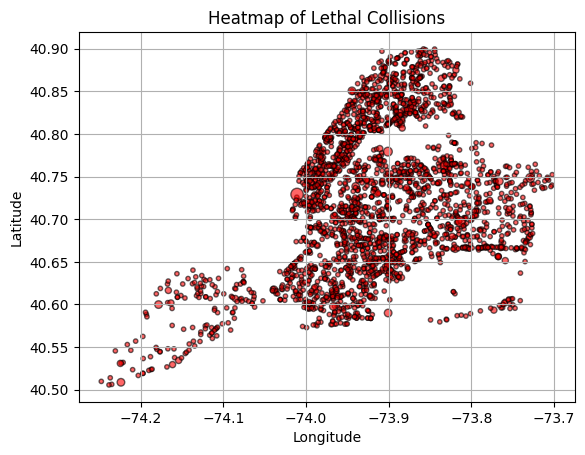

In [141]:
plt.scatter(x=lethal_collisions["longitude"], 
            y=lethal_collisions["latitude"],
            s=lethal_collisions["number_of_persons_killed"] * 10,
            color="red", edgecolor="black", alpha=0.6)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Heatmap of Lethal Collisions")
plt.grid(True)
plt.show()

## Number of pedestrians killed in lethal collisions

In [153]:
group_by_pedestrian_deaths = lethal_collisions.groupby("number_of_pedestrians_killed") \
                                              .count().reset_index()

group_by_pedestrian_deaths = group_by_pedestrian_deaths[["number_of_pedestrians_killed", "number_of_persons_killed"]]

group_by_pedestrian_deaths.rename(columns={ "number_of_persons_killed": "number_of_lethal_collisions" }, inplace=True)

group_by_pedestrian_deaths

,number_of_pedestrians_killed,number_of_lethal_collisions
0,0,1227
1,1,1324
2,2,10
3,6,1


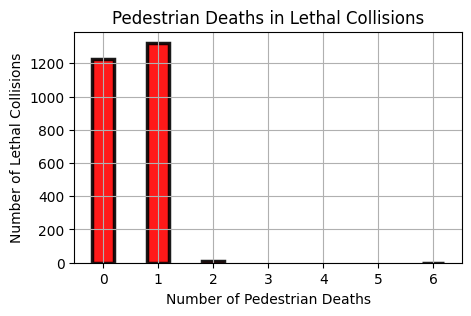

In [158]:
plt.figure(figsize=(5, 3))
plt.bar(x=group_by_pedestrian_deaths["number_of_pedestrians_killed"], 
        height=group_by_pedestrian_deaths["number_of_lethal_collisions"],
        width=0.4, color="red", alpha=0.9, edgecolor="black", linewidth=2.5)
plt.title("Pedestrian Deaths in Lethal Collisions")
plt.xlabel("Number of Pedestrian Deaths")
plt.ylabel("Number of Lethal Collisions")
plt.grid(True)
plt.show()

## Number of pedestrians killed in lethal collisions

In [165]:
group_by_cyclist_deaths = lethal_collisions.groupby("number_of_cyclist_killed") \
                                           .count().reset_index()

group_by_cyclist_deaths = group_by_cyclist_deaths[["number_of_cyclist_killed", "number_of_persons_killed"]]

group_by_cyclist_deaths.rename(columns={ "number_of_persons_killed": "number_of_lethal_collisions" }, inplace=True)

group_by_cyclist_deaths

,number_of_cyclist_killed,number_of_lethal_collisions
0,0,2355
1,1,206
2,2,1


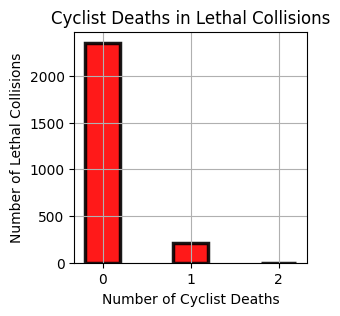

In [167]:
plt.figure(figsize=(3, 3))
plt.bar(x=group_by_cyclist_deaths["number_of_cyclist_killed"], 
        height=group_by_cyclist_deaths["number_of_lethal_collisions"],
        width=0.4, color="red", alpha=0.9, edgecolor="black", linewidth=2.5)
plt.title("Cyclist Deaths in Lethal Collisions")
plt.xlabel("Number of Cyclist Deaths")
plt.ylabel("Number of Lethal Collisions")
plt.grid(True)
plt.show()

## Number of motorists killed in lethal collisions

In [168]:
group_by_motorist_deaths = lethal_collisions.groupby("number_of_motorist_killed") \
                                           .count().reset_index()

group_by_motorist_deaths = group_by_motorist_deaths[["number_of_motorist_killed", "number_of_persons_killed"]]

group_by_motorist_deaths.rename(columns={ "number_of_persons_killed": "number_of_lethal_collisions" }, inplace=True)

group_by_motorist_deaths

,number_of_motorist_killed,number_of_lethal_collisions
0,0,1585
1,1,913
2,2,49
3,3,12
4,4,2
5,5,1


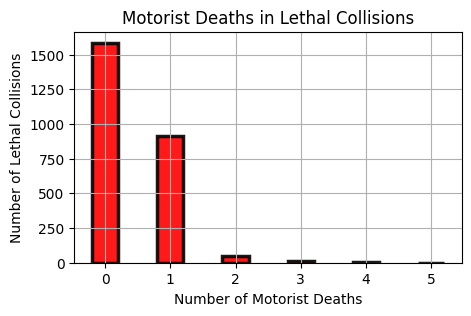

In [170]:
plt.figure(figsize=(5, 3))
plt.bar(x=group_by_motorist_deaths["number_of_motorist_killed"], 
        height=group_by_motorist_deaths["number_of_lethal_collisions"],
        width=0.4, color="red", alpha=0.9, edgecolor="black", linewidth=2.5)
plt.title("Motorist Deaths in Lethal Collisions")
plt.xlabel("Number of Motorist Deaths")
plt.ylabel("Number of Lethal Collisions")
plt.grid(True)
plt.show()

## Graphing number of injuries caused by collisions

In [171]:
sql_query = " \
    SELECT number_of_persons_injured, \
    number_of_pedestrians_injured, \
    number_of_cyclist_injured, \
    number_of_motorist_injured, \
    longitude, latitude \
    FROM `bigquery-public-data.new_york_mv_collisions.nypd_mv_collisions` \
    WHERE number_of_persons_injured > 0 \
    AND (longitude IS NOT NULL) \
    AND (latitude IS NOT NULL) \
"

bigquery_response = client.query(sql_query)

injury_collisions = bigquery_response.to_dataframe()

In [172]:
injury_collisions.head()

,number_of_persons_injured,number_of_pedestrians_injured,number_of_cyclist_injured,number_of_motorist_injured,longitude,latitude
0,6,0,0,6,-74.169840,40.570877
1,6,0,0,6,-74.155600,40.582256
2,7,0,0,7,-73.941542,40.585229
3,6,0,0,6,-73.997574,40.594550
4,6,0,0,6,-73.772835,40.595802


In [173]:
print(injury_collisions.shape)

# drop null values
injury_collisions.dropna(inplace=True)

# remove faulty longitude and latitude values
injury_collisions = clean_longitude_latitude(injury_collisions)

(423366, 6)
Shape before removing faulty longitudes: (423366, 6)
Shape after removing faulty longitudes: (421972, 6) 

Shape before removing faulty latitudes: (421972, 6)
Shape after removing faulty latitudes: (420899, 6)


In [176]:
injury_collisions["number_of_persons_injured"] = injury_collisions["number_of_persons_injured"].astype(np.float16)

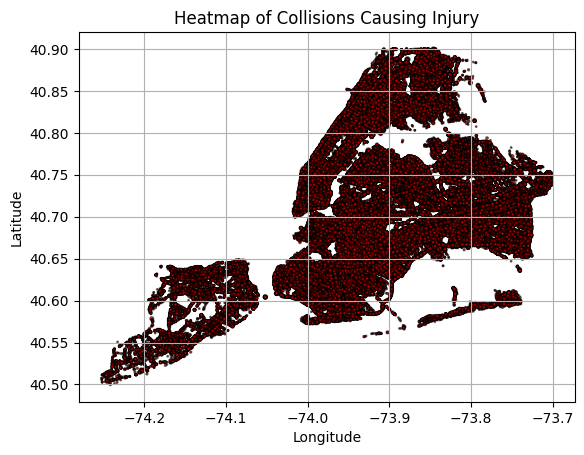

In [178]:
plt.scatter(x=injury_collisions["longitude"], 
            y=injury_collisions["latitude"],
            s=injury_collisions["number_of_persons_injured"],
            color="red", edgecolor="black", alpha=0.6)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Heatmap of Collisions Causing Injury")
plt.grid(True)
plt.show()

## Pedestrians injured due to collision

In [183]:
group_by_pedestrian_injuries = injury_collisions.groupby("number_of_pedestrians_injured") \
                                                .count().reset_index()

group_by_pedestrian_injuries = group_by_pedestrian_injuries[["number_of_pedestrians_injured", "number_of_persons_injured"]]

group_by_pedestrian_injuries.rename(columns={ "number_of_persons_injured": "number_of_collisions_causing_injury" }, inplace=True)

group_by_pedestrian_injuries

,number_of_pedestrians_injured,number_of_collisions_causing_injury
0,0,317272
1,1,99848
2,2,3340
3,3,339
4,4,57
5,5,21
6,6,11
7,7,4
8,8,1
9,9,2


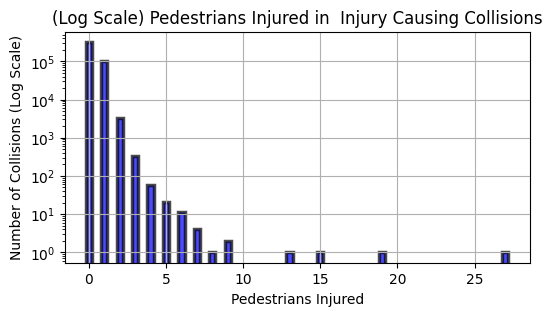

In [191]:
plt.figure(figsize=(6, 3))
plt.bar(x=group_by_pedestrian_injuries["number_of_pedestrians_injured"], 
        height=group_by_pedestrian_injuries["number_of_collisions_causing_injury"],
        width=0.4, color="blue", alpha=0.7, edgecolor="black", linewidth=2.5)
plt.title("(Log Scale) Pedestrians Injured in  Injury Causing Collisions")
plt.yscale("log")
plt.xlabel("Pedestrians Injured")
plt.ylabel("Number of Collisions (Log Scale)")
plt.grid(True)
plt.show()

### Cyclists injured in injury causing collisions

In [190]:
group_by_cyclist_injuries = injury_collisions.groupby("number_of_cyclist_injured") \
                                             .count().reset_index()

group_by_cyclist_injuries = group_by_cyclist_injuries[["number_of_cyclist_injured", "number_of_persons_injured"]]

group_by_cyclist_injuries.rename(columns={ "number_of_persons_injured": "number_of_collisions_causing_injury" }, inplace=True)

group_by_cyclist_injuries

,number_of_cyclist_injured,number_of_collisions_causing_injury
0,0,370242
1,1,50124
2,2,514
3,3,18
4,4,1


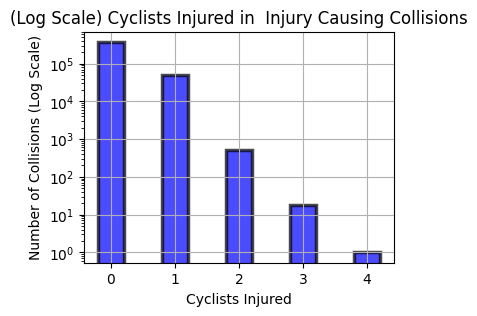

In [194]:
plt.figure(figsize=(4, 3))
plt.bar(x=group_by_cyclist_injuries["number_of_cyclist_injured"], 
        height=group_by_cyclist_injuries["number_of_collisions_causing_injury"],
        width=0.4, color="blue", alpha=0.7, edgecolor="black", linewidth=2.5)
plt.title("(Log Scale) Cyclists Injured in  Injury Causing Collisions")
plt.yscale("log")
plt.xlabel("Cyclists Injured")
plt.ylabel("Number of Collisions (Log Scale)")
plt.grid(True)
plt.show()

In [196]:
group_by_motorist_injuries = injury_collisions.groupby("number_of_motorist_injured") \
                                             .count().reset_index()

group_by_motorist_injuries = group_by_motorist_injuries[["number_of_motorist_injured", "number_of_persons_injured"]]

group_by_motorist_injuries.rename(columns={ "number_of_persons_injured": "number_of_collisions_causing_injury" }, inplace=True)

group_by_motorist_injuries.head()

,number_of_motorist_injured,number_of_collisions_causing_injury
0,0,158432
1,1,176768
2,2,54813
3,3,18970
4,4,7103


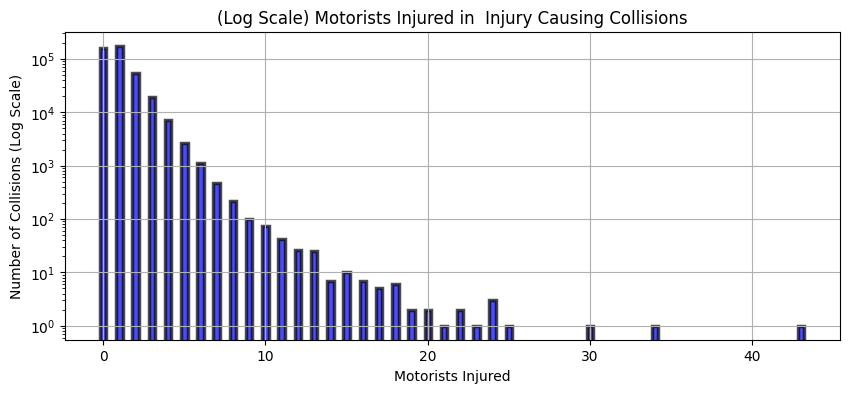

In [198]:
plt.figure(figsize=(10, 4))
plt.bar(x=group_by_motorist_injuries["number_of_motorist_injured"], 
        height=group_by_motorist_injuries["number_of_collisions_causing_injury"],
        width=0.4, color="blue", alpha=0.7, edgecolor="black", linewidth=2.5)
plt.title("(Log Scale) Motorists Injured in  Injury Causing Collisions")
plt.yscale("log")
plt.xlabel("Motorists Injured")
plt.ylabel("Number of Collisions (Log Scale)")
plt.grid(True)
plt.show()

## First group of factors contributing to collisions

In [199]:
sql_query = " \
    SELECT contributing_factor_vehicle_1, COUNT(*) AS number_of_collisions \
    FROM `bigquery-public-data.new_york_mv_collisions.nypd_mv_collisions` \
    GROUP BY contributing_factor_vehicle_1 \
    ORDER BY number_of_collisions DESC \
"

bigquery_response = client.query(sql_query)

first_factor_contributing_to_collisions = bigquery_response.to_dataframe()

In [201]:
first_factor_contributing_to_collisions.head(10)

,contributing_factor_vehicle_1,number_of_collisions
0,Unspecified,705582
1,Driver Inattention/Distraction,414046
2,Failure to Yield Right-of-Way,122943
3,Following Too Closely,110620
4,Backing Unsafely,76582
5,Other Vehicular,64252
6,Passing or Lane Usage Improper,57646
7,Passing Too Closely,51525
8,Turning Improperly,51127
9,Fatigued/Drowsy,47397


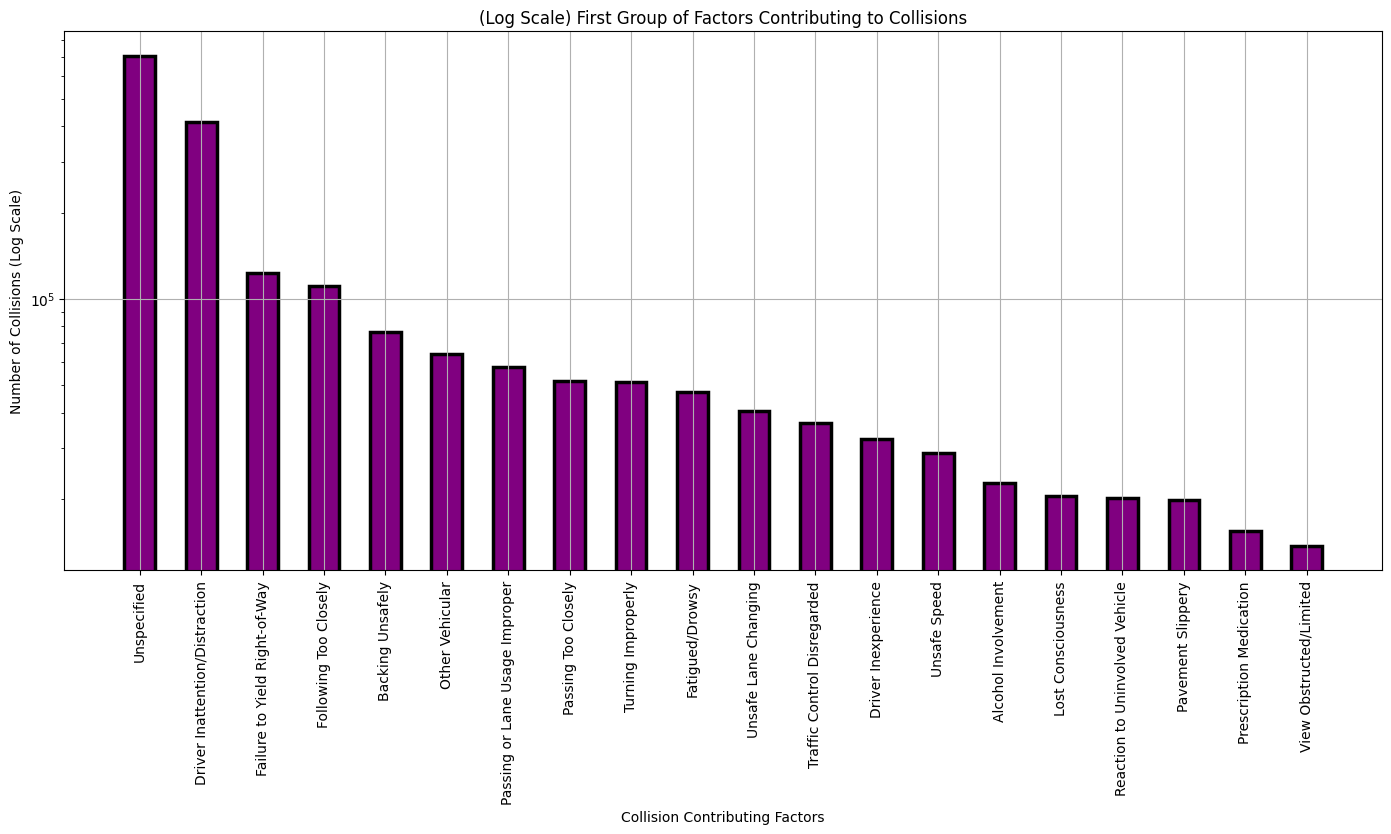

In [205]:
plt.figure(figsize=(17, 7))
plt.bar(x=first_factor_contributing_to_collisions[:20]["contributing_factor_vehicle_1"], 
        height=first_factor_contributing_to_collisions[:20]["number_of_collisions"],
        width=0.5, color="purple", edgecolor="black", linewidth=2.5)
plt.xticks(rotation=90)
plt.yscale("log")
plt.title("(Log Scale) First Group of Factors Contributing to Collisions")
plt.xlabel("Collision Contributing Factors")
plt.ylabel("Number of Collisions (Log Scale)")
plt.grid(True)
plt.show()